# Generating Multivariate Polynomial feature matrix

In [1]:
import random
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations_with_replacement
from matplotlib import cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fname = 'fods_1.csv'
df = pd.read_csv(fname,header=0,encoding='UTF8')

In [3]:
# tranform data into x1,x2,x1^2,x1x2,x2^2,x1^3,x1^2x2,x1x2^2,x2^3,..... depending on power  of x1 and x2
fmatrix = np.ones((len(df), 1))

for i in range(1, 10):
    for j in range(i+1):
        fmatrix = np.c_[fmatrix, np.power(df['MLOGP'],(i-j))*np.power(df['RDCHI'],j)]
fmatrix.shape   

(546, 55)

# Multivariate Polynomial Regression

In [4]:
y=df.iloc[:,2:3]
y = y.to_numpy()
y[0:5]

array([[3.74 ],
       [4.33 ],
       [7.019],
       [6.723],
       [5.979]])

In [5]:
def prediction(data, theta):
    X = data[:,0:-1]
    
    y_pred = np.dot(X, theta)
    return y_pred

In [6]:
def norm(data):
    normalize = (data - data.min()) /(data.max()-data.min())
    return normalize

In [7]:
def cost(data, theta):
    m = len(data)
    X = data[:,0:-1]
    y = data[:,-1].reshape(-1, 1)
    
    c = np.sum(np.power((np.dot(X, theta) - y),2)) / (2 * m)
    
    return c

In [8]:
def sgd(data, theta, alpha, num_iters):
    m = len(data)
    X = data[:,0:-1]
    y = data[:,-1].reshape(-1, 1)
    error_his = np.zeros(num_iters)
    
    for iter in range(num_iters):
        idx = np.random.randint(0, m, 1)[0]
        delta = (X[idx].reshape(-1, 1)) * (np.dot(X[idx].reshape(1, -1), theta)[0,0] - y[idx][0])
        theta = theta - (alpha/m)*delta
        error_his[iter] = cost(data, theta)
        
    return theta,error_his

In [9]:

def rmse(data, final_weights):
    X=data[:,0:-1]
    y=data[:,1].reshape(-1,1)
    return (np.sqrt(np.square(np.dot(X, final_weights)-y).mean()))


In [10]:
order=[]
for i in range(len(y)):
    order.append(i)

shuffle = random.sample(order, int(len(order) * 0.8))

rem = [i for i in order if i not in shuffle]

In [11]:
train_errors = []
test_errors = []
theta_list = []
rmse_train=[]
rmse_test=[]
for i in range(10):
    
    print("degree of polynomial regression", i)
    
    X = np.ones((len(df), 1))
    if i > 0:
        for j in range(1, int((i+1)*(i+2)/2)):
            X = np.c_[X, fmatrix[:,j]]
    
    data = np.c_[X, y]
    
    train_set = data[shuffle,:]
    test_set = data[rem, :]
    
    theta = np.zeros((X.shape[1], 1))
    
    if i > 0:
        train_set = norm(train_set)
        
    theta, error_his = sgd(train_set, theta, 0.01, np.power(10,3))
    theta_list.append(theta)
    
    train_errors.append(error_his[-1])
    
    if i > 0:
        test_set = norm(test_set)
        
    y_pred = prediction(test_set, theta)
    test_cost = cost(test_set, theta)
    test_errors.append(test_cost)
    rmse_train.append(rmse(train_set, theta))
    rmse_test.append(rmse(test_set, theta))
    print("rmse training error", rmse(train_set, theta))
    print("rmse test error", rmse(test_set, theta))
    

degree of polynomial regression 0
rmse training error 4.845983800511408
rmse test error 4.846399167927837
degree of polynomial regression 1
rmse training error 0.5332028397564934
rmse test error 0.3606715477448121
degree of polynomial regression 2
rmse training error 0.2801094463484647
rmse test error 0.11957891967584557
degree of polynomial regression 3
rmse training error 0.25706936979407
rmse test error 0.04641774299488173
degree of polynomial regression 4
rmse training error 0.14931109482103033
rmse test error 0.023502502227644745
degree of polynomial regression 5
rmse training error 0.14643692952806325
rmse test error 0.012664105970870582
degree of polynomial regression 6
rmse training error 0.08037516843771757
rmse test error 0.0070849567377700125
degree of polynomial regression 7
rmse training error 0.07898377636239272
rmse test error 0.003929310601887619
degree of polynomial regression 8
rmse training error 0.04169821941884413
rmse test error 0.0021989061777691137
degree of pol

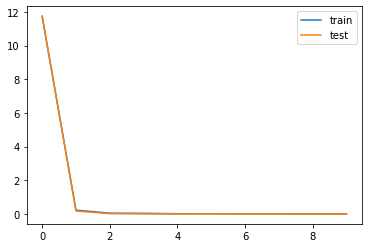

In [12]:
# plot error 
plt.plot(train_errors, label='train')
plt.plot(test_errors, label='test')
plt.legend()
plt.show()


[4.845983800511408, 0.5332028397564934, 0.2801094463484647, 0.25706936979407, 0.14931109482103033, 0.14643692952806325, 0.08037516843771757, 0.07898377636239272, 0.04169821941884413, 0.04097637506682856]
[4.846399167927837, 0.3606715477448121, 0.11957891967584557, 0.04641774299488173, 0.023502502227644745, 0.012664105970870582, 0.0070849567377700125, 0.003929310601887619, 0.0021989061777691137, 0.0012211703398625584]


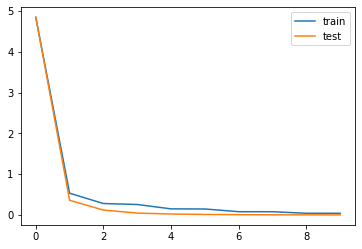

In [13]:
# plot rmse error
print(rmse_train)
print(rmse_test)
plt.plot(rmse_train, label='train')
plt.plot(rmse_test, label='test')
plt.legend()
plt.show()


# Surface Plots

In [14]:
# tranform data into x1,x2,x1^2,x1x2,x2^2,x1^3,x1^2x2,x1x2^2,x2^3,..... depending on power  of x1 and x2
fmatrix = np.ones((len(df), 1))

for i in range(1, 10):
    for j in range(i+1):
        fmatrix = np.c_[fmatrix, np.power(df['MLOGP'],(i-j))*np.power(df['RDCHI'],j)]

In [15]:
x_surf, y_surf = np.meshgrid(np.linspace(-50, 50, 1000), np.linspace(-50, 50, 1000))

In [16]:
x_plot = pd.DataFrame({'MLOGP': x_surf.ravel(), 'RDCHI': y_surf.ravel()})
x_plot = x_plot.to_numpy()

In [17]:
fmatrix_p = np.ones((len(x_plot), 1))


In [18]:
for i in range(1, 10):
    for j in range(i+1):
        fmatrix_p = np.c_[fmatrix_p, (x_plot[:,0]**(i-j))*(x_plot[:,1]**j)]

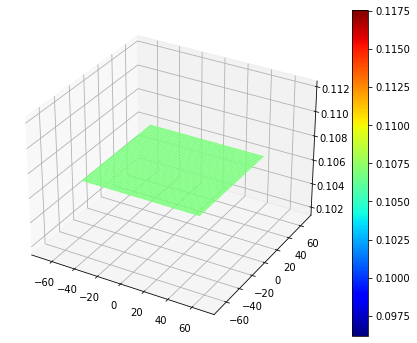

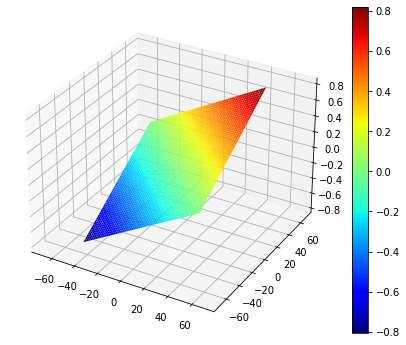

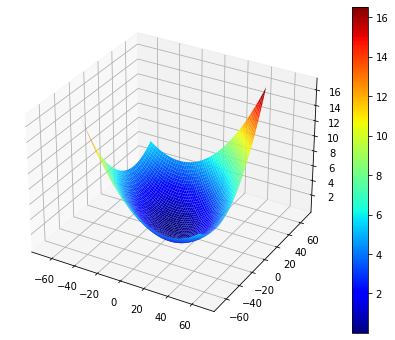

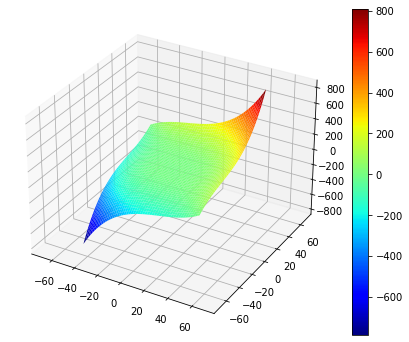

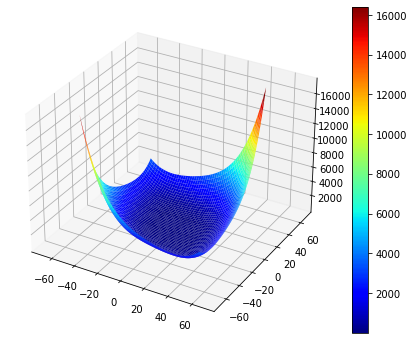

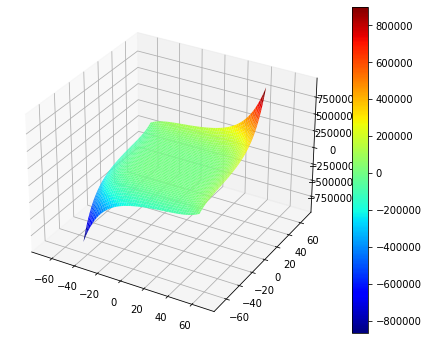

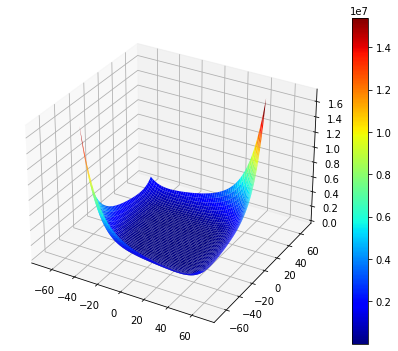

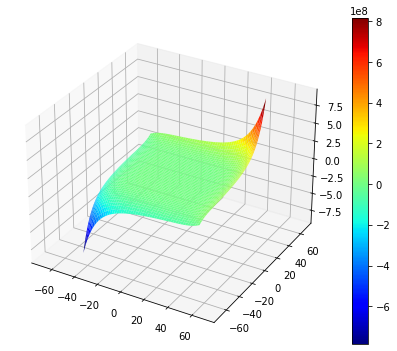

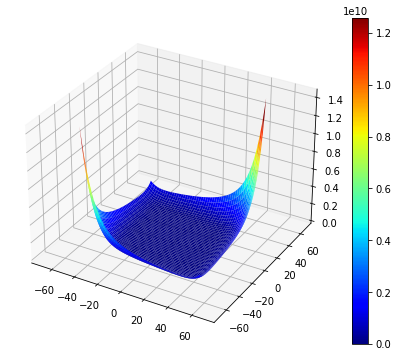

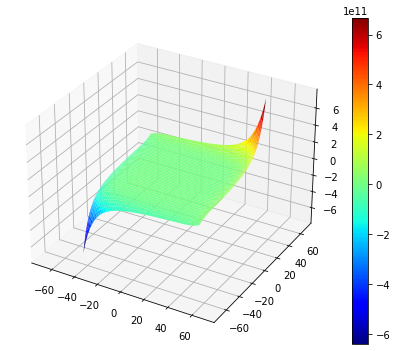

In [19]:
for i in range(10):
    X_plt = np.ones((len(x_plot), 1))
    if i > 0:
        for j in range(1, int((i+1)*(i+2)/2)):
            X_plt = np.c_[X_plt, fmatrix_p[:,j]]
            
    dpoints = np.c_[X_plt, np.ones((len(x_plot), 1))]
    
    y_pred_plt = prediction(dpoints, theta_list[i])
    
    fig = plt.figure(figsize=(16, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(x_surf, y_surf, y_pred_plt.reshape(x_surf.shape), cmap=cm.jet)

    ax1.set_xlim((-75, 75))
    ax1.set_ylim((-75, 75))
    fig.colorbar(surf, ax=ax1)
    plt.show()